In [1]:
import pandas as pd
import numpy as np
import scipy.stats as stats

import warnings
warnings.filterwarnings('ignore')

pd.set_option('display.max_rows', 100) 
pd.set_option('display.max_columns',100)

import matplotlib.pyplot as plt
from matplotlib.cm import get_cmap

cmap = get_cmap('rainbow')
plt.style.use('fivethirtyeight')

df = pd.read_csv('HF remote care database_eng - summarize.csv')

# select columns and change data types 

column = ['group', 'Gender', 'Age','HF_NYHA_class','EQ-5D_sum0','IADL_sum0','EQ_5D_sum1','IADL_sum1',
         'Hgb', 'Hct', 'RBC', 'RDW', 'WBC', 'Platelet',
       'Neutrophil Seg', 'Lymphocyte', 'Monocyte', 'Eosinophils', 'Basophils',
       'Albumin', 'BUN', 'Cholesterol', 'Creatinine', 'TG',
       'Glucose  (non-fasting)', 'GFR', 'CRP', 'NT-pro BNP', 'K', 'Na',
       'Troponin I', 'BNP', 'LVEF(2D)', 'Pwd (cm)', 'LVIDd (cm)', 'LVIDs (cm)',
       'IVSd (cm)', 'E/A ratio', 'Ao (cm)', 'LAD (cm)', 'LVEF     (M-mode)',
       'Peak E (m/s)', 'Peak A (m/s)']

selected_df = df[column]

for column in selected_df.loc[:,'Neutrophil Seg':'Peak A (m/s)'].columns.values:
    selected_df[column] = pd.to_numeric(selected_df[column], errors='coerce')

selected_df['Gender'] = selected_df['Gender'].replace({0:'Female',1:'Male'})

selected_df['Gender'] = selected_df['Gender'].astype('category')
selected_df['HF_NYHA_class'] = selected_df['HF_NYHA_class'].astype('category')
selected_df['group'] = selected_df['group'].astype('category')

test_group = selected_df[selected_df['group']=='test']
control_group = selected_df[selected_df['group']=='control']

num_observations_test = []
num_observations_control = []
mean_test = []
mean_control = []
sd_test = []
sd_control = []
ttest_pvalue = []
ttest_statistic = []
num_df = selected_df.drop(['Gender','HF_NYHA_class'],axis=1)

for col in num_df.columns.values[1:]:
    num_observations_test.append(test_group[col].notna().sum())
    num_observations_control.append(control_group[col].notna().sum())
    mean_test.append(round(np.mean(test_group[col]),3))
    mean_control.append(round(np.mean(control_group[col]),3))
    sd_test.append(round(np.std(test_group[col],ddof=1),3))
    sd_control.append(round(np.std(control_group[col],ddof=1),3))
    t = stats.ttest_ind(test_group[col],control_group[col],equal_var=True,nan_policy='omit')
    ttest_pvalue.append(np.round(t.pvalue,3))
    ttest_statistic.append(np.round(t.statistic,3))

baseline_results = pd.DataFrame({'Test(obs)':num_observations_test, 
                                 'Control(obs)':num_observations_control,
                                'Mean (test)':mean_test, 'Mean (control)':mean_control,
                                'SD (test)':sd_test, 'SD (control)':sd_control,
                                'ttest (pvalue)':ttest_pvalue,
                                'ttest (statistics)':ttest_statistic},
                               index=num_df.columns.values[1:])

In [2]:
import matplotlib as mpl
mpl.rcParams.update({'errorbar.capsize': 12})

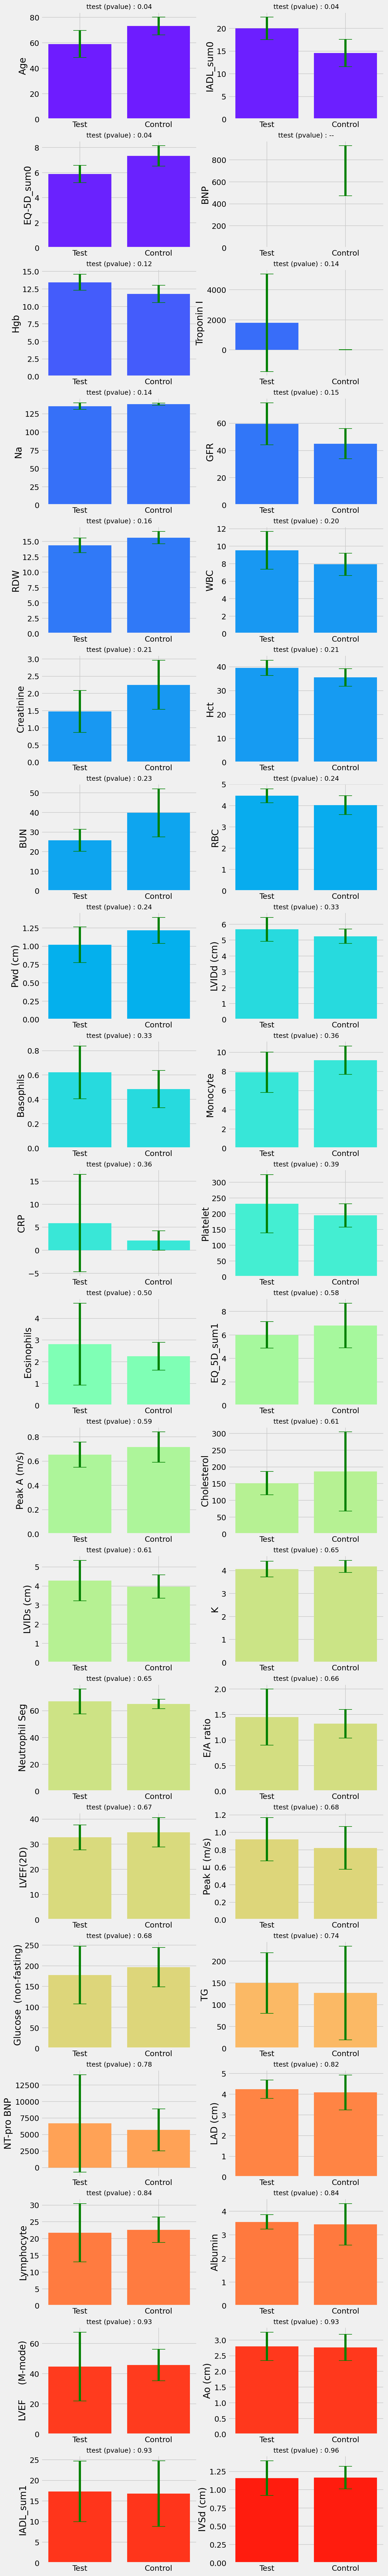

In [3]:
baseline_results['se(test)'] = baseline_results['SD (test)'] / np.sqrt(baseline_results['Test(obs)'])
baseline_results['se(control)'] = baseline_results['SD (control)'] / np.sqrt(baseline_results['Control(obs)'])

baseline_t = baseline_results.sort_values(by='ttest (pvalue)').transpose()
i = 1
plt.figure(figsize=(10,80), dpi=150)
for col in baseline_t.columns.values:
    plt.subplot(20,2,i)
    plt.bar(['Test','Control'],[baseline_t[col]['Mean (test)'], baseline_t[col]['Mean (control)']],
           yerr = [baseline_t[col]['se(test)']*1.96, baseline_t[col]['se(control)']*1.96],
           color=[cmap(baseline_t[col]['ttest (pvalue)'])], ecolor='green',capsize=12)
    plt.ylabel(col)
    plt.title(f"ttest (pvalue) : {baseline_t[col]['ttest (pvalue)']:.2f}", fontsize=12)
    i += 1

## Comparing by Test and Control

In [4]:
baseline_results.sort_values(by='ttest (pvalue)')

,Test(obs),Control(obs),Mean (test),Mean (control),SD (test),SD (control),ttest (pvalue),ttest (statistics),se(test),se(control)
Age,9,21,59.000,73.143,16.279,16.353,0.038,-2.174,5.426333,3.568517
IADL_sum0,9,21,20.000,14.571,3.808,7.075,0.04,2.157,1.269333,1.543892
EQ-5D_sum0,9,21,5.889,7.333,1.054,1.906,0.043,-2.124,0.351333,0.415923
BNP,1,6,485.000,701.550,NaN,284.089,--,--,NaN,115.978849
Hgb,9,21,13.456,11.781,1.740,2.896,0.12,1.605,0.580000,0.631959
Troponin I,9,17,1805.178,14.967,4963.623,20.866,0.143,1.515,1654.541000,5.060748
Na,9,21,135.333,138.095,6.874,3.330,0.145,-1.498,2.291333,0.726666
GFR,9,20,59.456,44.925,23.574,25.257,0.155,1.461,7.858000,5.647637
RDW,9,21,14.378,15.638,1.810,2.304,0.157,-1.455,0.603333,0.502774
WBC,9,21,9.522,7.924,3.295,3.000,0.204,1.3,1.098333,0.654654


In [5]:
group1 = selected_df[selected_df['Gender']=='Male']
group2 = selected_df[selected_df['Gender']=='Female']

num_observations_1 = []
num_observations_2 = []
mean_1 = []
mean_2 = []
sd_1 = []
sd_2 = []
ttest_pvalue = []
ttest_statistic = []
num_df = selected_df.drop(['group','HF_NYHA_class'],axis=1)

for col in num_df.columns.values[1:]:
    num_observations_1.append(group1[col].notna().sum())
    num_observations_2.append(group2[col].notna().sum())
    mean_1.append(np.mean(group1[col]))
    mean_2.append(np.mean(group2[col]))
    sd_1.append(np.std(group1[col]))
    sd_2.append(np.std(group2[col]))
    t = stats.ttest_ind(group1[col],group2[col],equal_var=True,nan_policy='omit')
    ttest_pvalue.append(t.pvalue)
    ttest_statistic.append(t.statistic)

baseline_results_by_gender = pd.DataFrame({'Male(obs)':num_observations_1, 
                                 'Female(obs)':num_observations_2,
                                'Mean (male)':mean_1, 'Mean (female)':mean_2,
                                'SD (male)':sd_1, 'SD (female)':sd_2,
                                'ttest (pvalue)':ttest_pvalue,
                                'ttest (statistics)':ttest_statistic},
                               index=num_df.columns.values[1:])

## Comparing by Gender

In [6]:
baseline_results_by_gender.sort_values(by='ttest (pvalue)')

,Male(obs),Female(obs),Mean (male),Mean (female),SD (male),SD (female),ttest (pvalue),ttest (statistics)
Ao (cm),9,8,3.244444,2.250000,0.457314,0.357071,0.000313,4.652674
LVIDd (cm),9,8,5.722222,4.975000,0.671280,0.718940,0.054979,2.081040
Monocyte,17,12,9.741176,7.408333,3.489827,2.341103,0.062070,1.946494
Cholesterol,3,3,123.333333,214.333333,16.357126,64.131809,0.123743,-1.944452
Platelet,18,12,182.166667,242.166667,64.007161,135.731250,0.127885,-1.568982
Glucose (non-fasting),12,7,168.500000,231.571429,67.560467,94.092443,0.127953,-1.600286
Pwd (cm),9,8,1.266667,1.037500,0.282843,0.268968,0.129826,1.602788
Eosinophils,17,12,2.017647,3.016667,1.426734,2.371650,0.184279,-1.362562
Albumin,4,4,3.800000,3.200000,0.412311,0.578792,0.193951,1.462400
E/A ratio,6,5,1.216000,1.520400,0.394530,0.303078,0.233333,-1.277682
